In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.metrics import silhouette_score

df = pd.read_csv("health.csv",index_col=False)
# df.head()


,rank,country,quality_of_life,purchasing_power_index,safety_index,health_care_index,cost_of_living_index,property_price_to_income_ratio,traffic_commute_time_index,pollution_index,climate_index
0,1,Switzerland,195.06,116.19,77.88,75.32,110.34,8.86,28.37,19.39,79.56
1,2,Denmark,194.15,99.76,73.66,79.77,73.09,6.30,28.41,20.92,81.80
2,3,Netherlands,191.46,99.58,72.43,75.93,67.71,7.36,26.63,24.72,86.92
3,4,Australia,190.72,117.56,55.17,77.76,72.27,5.60,34.68,24.19,93.90
4,5,Finland,186.84,91.00,73.16,76.75,63.75,7.54,27.58,12.02,56.64


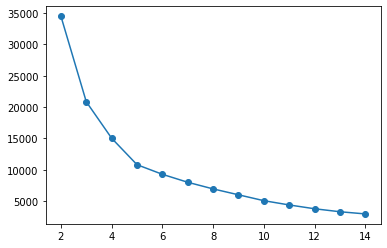

In [9]:

# K - Means works with Numeric Data
selected_cols = [ "quality_of_life","health_care_index"]
cluster_data = df.loc [ : , selected_cols]
# cluster_data

#Plotting Scree Plot to find optimum number of clusters
clusters_range = [ 2,3,4,5,6,7,8,9,10,11,12,13,14 ]
inertias = []
for c in clusters_range :
    kmeans = KMeans(init = 'k-means++',n_clusters=c,n_init=100,random_state=0).fit(cluster_data)
    inertias.append ( kmeans.inertia_ )
plt.figure()
plt.plot(clusters_range , inertias , marker = 'o')
plt.show()


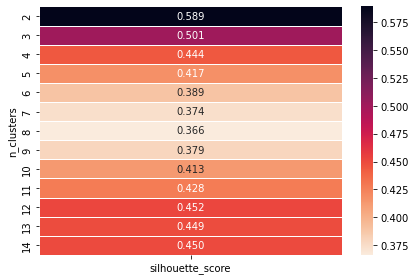

In [10]:
from sklearn.metrics import silhouette_samples , silhouette_score
clusters_range = range ( 2,15 )
results = []
for c in clusters_range :
    clusterer = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_data)
    silhouette_avg = silhouette_score(cluster_data,cluster_labels)
    results.append([c,silhouette_avg])
result = pd.DataFrame(results,columns=["n_clusters","silhouette_score"])
pivot_km = pd.pivot_table(result,index="n_clusters",values="silhouette_score")
plt.figure()
sns.heatmap(pivot_km,annot=True,linewidths=.5,fmt='.3f',cmap=sns.cm.rocket_r)
plt.tight_layout()

In [25]:
kmeans_sel = KMeans(init='k-means++',n_clusters=3,n_init=100,random_state=1).fit(cluster_data)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)
# scatters(clustered_data,h='Cluster')

In [28]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

c:\Users\jthomas1\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3251: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



""
Cluster
0
1
2
